In [12]:
print("hello python")

hello python


In [13]:
import os
os.getcwd()

'C:\\Users\\Master'

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
df = pd.read_csv('./toluca_company_dataset.csv') ## 데이터 불러오기

In [17]:
df.head(5)

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


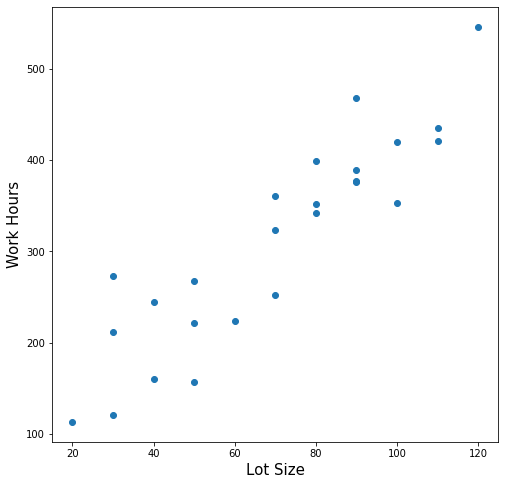

In [19]:
fig=plt.figure(figsize=(8,8))
fig.set_facecolor('white')
font_size=15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

In [20]:
## states model 사용
fit = ols('Work_hours ~ Lot_size',data=df).fit()  ## 단순선형회귀모형 적합

In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           4.45e-10
Time:                        22:25:11   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
## 회귀 계수
print(fit.params.Intercept) ## 절편
print(fit.params.Lot_size) ## 기울기

62.36585858585867
3.5702020202020197


In [24]:
## 추정값
fit.fittedvalues

0     347.982020
1     169.471919
2     240.875960
3     383.684040
4     312.280000
5     276.577980
6     490.790101
7     347.982020
8     419.386061
9     240.875960
10    205.173939
11    312.280000
12    383.684040
13    133.769899
14    455.088081
15    419.386061
16    169.471919
17    240.875960
18    383.684040
19    455.088081
20    169.471919
21    383.684040
22    205.173939
23    347.982020
24    312.280000
dtype: float64

In [25]:
## 잔차
fit.resid

0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
dtype: float64

In [26]:
## 예측값
fit.predict(exog=dict(Lot_size=[80]))  #제품사이즈가 80이면 약 348시간이 걸린다고 예측

0    347.98202
dtype: float64

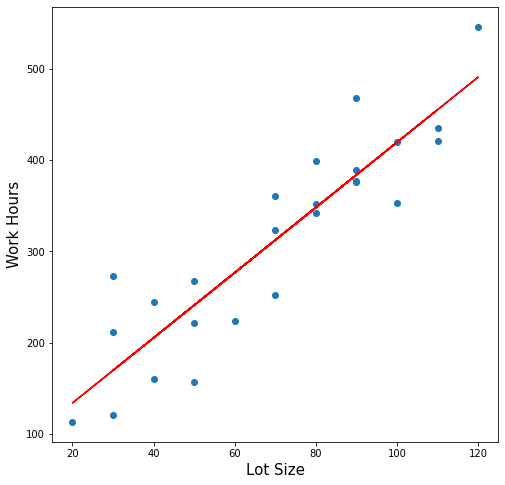

In [27]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도
plt.plot(df['Lot_size'],fit.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

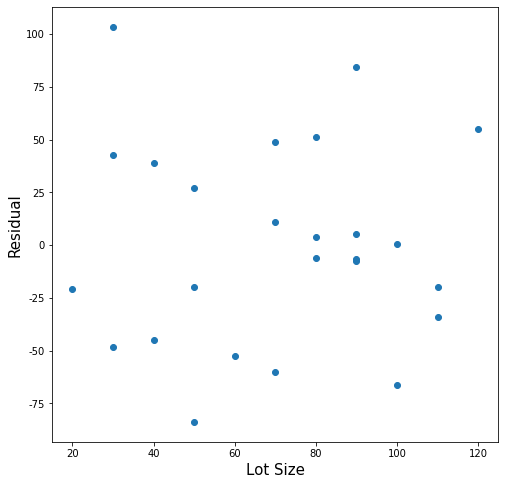

In [28]:
## 잔차도 Residual Plot
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
 
plt.scatter(df['Lot_size'],fit.resid) ## 잔차도 출력
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()

In [29]:
## sklearn linear regression 사용
x = df['Lot_size'].values.reshape(-1,1) ## 차원 증가 시켜준다.
y = df['Work_hours']
 
fit = LinearRegression().fit(x,y) ## 단순선형회귀모형 적합

In [30]:
## 회귀 계수
print(fit.intercept_) ## 절편
print(fit.coef_) ## 기울기

62.36585858585849
[3.57020202]


In [31]:
## 추정값
fit.predict(x)

array([347.9820202 , 169.47191919, 240.8759596 , 383.6840404 ,
       312.28      , 276.5779798 , 490.79010101, 347.9820202 ,
       419.38606061, 240.8759596 , 205.17393939, 312.28      ,
       383.6840404 , 133.76989899, 455.08808081, 419.38606061,
       169.47191919, 240.8759596 , 383.6840404 , 455.08808081,
       169.47191919, 383.6840404 , 205.17393939, 347.9820202 ,
       312.28      ])

In [32]:
## 잔차
residual = y - fit.predict(x)
print(residual)

0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
Name: Work_hours, dtype: float64


In [33]:
## 예측값
fit.predict([[80]])

array([347.9820202])

In [ ]:
## 출처
## https://zephyrus1111.tistory.com/52